# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
## **<p style = "text-align: center">KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Install the package**

# **Import the package**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Setting**

In [78]:
sns.set_style("ticks")
a4size = (11.7, 8.27)
a2size = (16.5, 23.4)
a2size_ls = (23.4, 16.5)

# **Information of dataset**

- Dataset được lấy từ <a href = "https://www.kaggle.com"> Kaggle </a>. <br>
- Dataset là thông tin giá cả của những căn nhà ở Hà Nội thông qua các đặc điểm của một căn nhà.<br>
- Trang của Dataset <a herf = "https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi"> https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi</a>. <br>
- Tác giả của Dataset: LE ANH DUC. <br>
- License: CC BY-NC-SA 4.0


---

# **EDA and Preprocessing**

Dataset sau khi download về được lưu trong thư mục csv <br>

Đưa dữ liệu DataFrame vào biến `housing_df`

In [79]:
housing_df = pd.read_csv("csv/VN_housing.csv").drop(columns=['Unnamed: 0'])

In [80]:
housing_df.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


### **1. Khám phá, tiền xử lí cho toàn bộ dữ liệu**

- **1.1 Số chiều của DataFrame**

In [81]:
housing_df.shape

(82497, 12)

Dữ liệu gồm có `82497` dòng và `13` cột

- **1.2 Các dòng của Dataframe**

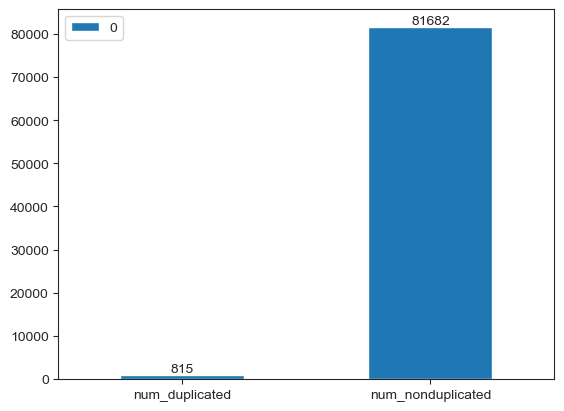

In [82]:
num_duplicated = housing_df.duplicated().sum()
duplicated_df = pd.Series({
    "num_duplicated": num_duplicated,
    "num_nonduplicated": housing_df.shape[0] - num_duplicated
}).to_frame()

fig, ax = plt.subplots()
duplicated_df.plot.bar(rot = 0, ax = ax)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

Có 815 hàng bị trùng. Ta sẽ tiến hành xoá đi các hàng này.

In [83]:
housing_df.drop_duplicates(ignore_index=True, inplace=True)
housing_df.duplicated().sum()

0

- **1.3 Các cột của Dataframe**

In [84]:
housing_df.columns

Index(['Ngày', 'Địa chỉ', 'Quận', 'Huyện', 'Loại hình nhà ở',
       'Giấy tờ pháp lý', 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Dài',
       'Rộng', 'Giá/m2'],
      dtype='object')

##### **Vì các cột có tên Tiếng Việt có dấu, nên có một ít "khó chịu" trong quá trình thực hiện đồ án. Nên ta sẽ thay đổi các tên cột.**


In [85]:
housing_df = housing_df.rename(columns = {
    "Ngày": "Date",
    "Địa chỉ": "Address",
    "Quận": "District", # Quận
    "Huyện": "Ward", # Phường, Huyện
    "Loại hình nhà ở": "Type",
    "Giấy tờ pháp lý": "Legal",
    "Số tầng": "Number of floors",
    "Số phòng ngủ": "Number of bedrooms",
    "Diện tích": "Area",
    "Dài": "Length",
    "Rộng": "Width",
    "Giá/m2": "Price/m2"
})

In [86]:
missing_dictionary = {
    "num_missing": housing_df.isna().sum(),
    "missing_ratio (%)": housing_df.isna().sum()*100/len(housing_df)
}
missing_df = pd.DataFrame(missing_dictionary)
missing_df

,num_missing,missing_ratio (%)
Date,1,0.001224
Address,48,0.058764
District,2,0.002449
Ward,48,0.058764
Type,32,0.039176
Legal,28422,34.795916
Number of floors,45463,55.658529
Number of bedrooms,39,0.047746
Area,2,0.002449
Length,61934,75.823315


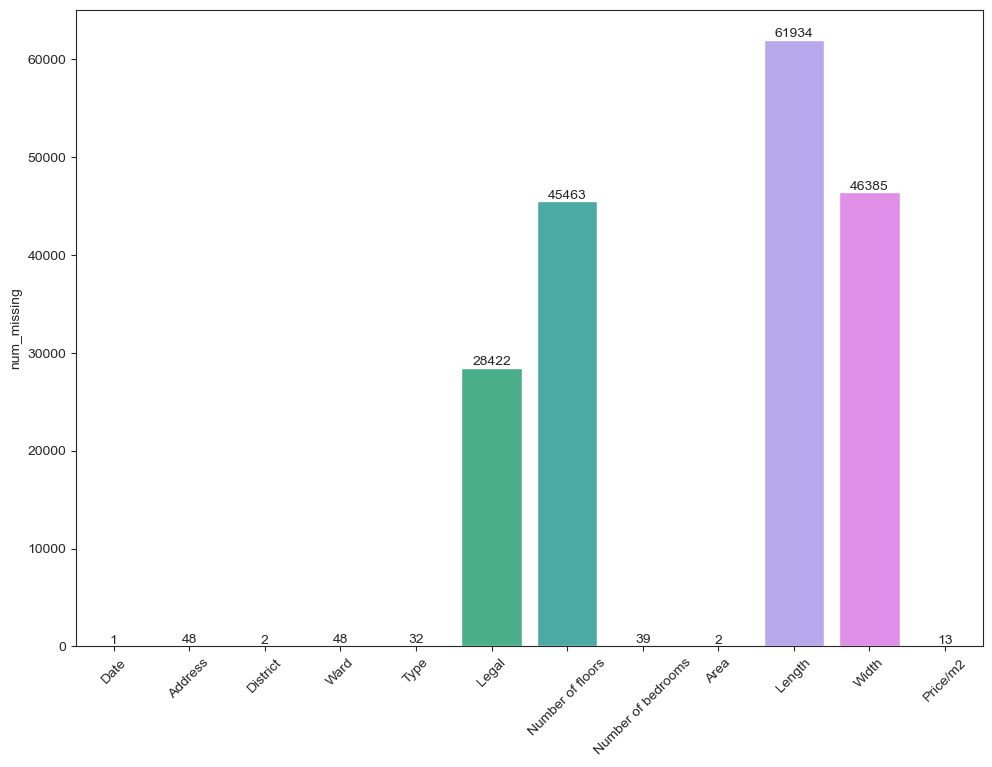

In [87]:
fig, ax = plt.subplots()
#The size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(y = missing_df["num_missing"], x = missing_df.index, data = missing_df, ax = ax)
#Set rotation of x label
ax.tick_params(axis = 'x', rotation = 45)

#Add the value for each container
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Nhận xét**<br>
Các cột `Legal`, `Number of floors`, `Length`, `Width` có dữ liệu thiếu rất nhiều.

##### **Tìm hiểu có những kiểu dữ liệu gì bên trong một cột**

In [88]:
def open_object_dtype(series):
    setType = list(set(series.apply(lambda x: type(x))))
    return setType

In [89]:
columns = housing_df.columns
housing_df[columns].apply(open_object_dtype)

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>


Tất cả các cột đều có 2 kiểu dữ liệu là `float` và `string`. <br>
Truy xuất vào từng cột dữ liệu `nghi ngờ` để khám phá và xử lí nó

##### **Tìm hiểu từng cột dữ liệu**

- **Date**<br>

In [90]:
housing_df['Date'].head(5)

0    2020-08-05
1    2020-08-05
2    2020-08-05
3    2020-08-05
4    2020-08-05
Name: Date, dtype: object

Có một giá trị trong cột này bị thiếu.

In [91]:
housing_df[housing_df.Date.isna()]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
81681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
housing_df.index.max()

81681

Chỉ số `index` của dòng này bằng với số lượng dòng của Dataframe - 1<br>
Nên đây là dòng cuối cùng của Dataframe. Và đây là dòng duy nhất bị full `NaN`

**Xóa dòng cuối cùng của Dataframe**

In [93]:
housing_df = housing_df.iloc[:-1]

**Theo quan sát, cột `Date` chứa thông tin của các ngày, tuy nhiên kiểu dữ liệu của cột này là `object`. Nên cần thay đổi kiểu dữ liệu của cột này thành `datetime`.**

In [94]:
housing_df.Date = pd.to_datetime(housing_df.Date, errors = 'coerce')

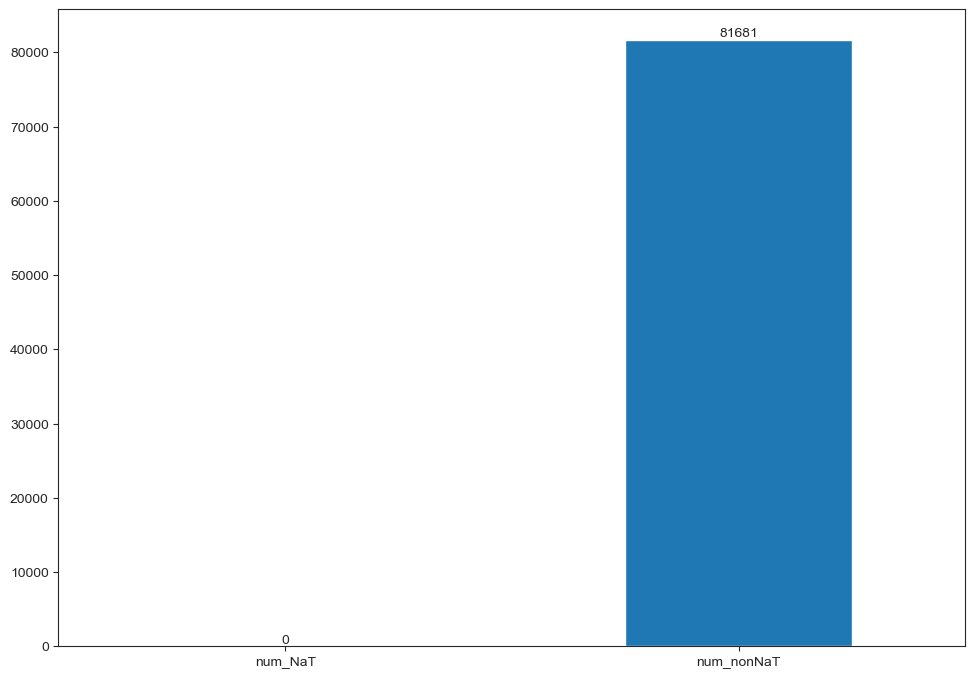

In [95]:
nat_df = pd.Series({
    "num_NaT": housing_df.Date.isnull().sum(),
    "num_nonNaT": len(housing_df) -  housing_df.Date.isnull().sum()
})

fig, ax  = plt.subplots()
fig.set_size_inches(a4size)

nat_df.plot.bar(rot = 0, ax = ax)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


In [96]:
housing_df.dtypes

Date                  datetime64[ns]
Address               object        
District              object        
Ward                  object        
Type                  object        
Legal                 object        
Number of floors      object        
Number of bedrooms    object        
Area                  object        
Length                object        
Width                 object        
Price/m2              object        
dtype: object

Như vậy các giá trị của cột `Date` đều đã chuyển đổi thành công sang kiểu dữ liệu `datetime`  và không có dữ liệu nào là `NaT`

- **Address - District - Ward**<br>

In [97]:
columns = ["Address", "District", "Ward"]

In [98]:
address_df = housing_df[columns].copy()

In [99]:
address_df

,Address,District,Ward
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Nghĩa Đô
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Thụy Khuê
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang
...,...,...,...
81676,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc Từ Liêm, Hà Nội",Quận Bắc Từ Liêm,Phường Phúc Diễn
81677,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa
81678,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa
81679,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa


In [100]:
housing_df.Address.iloc[1]

'Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội'

In [101]:
# adr_test = housing_df.Address.apply(lambda x: x.str.split(", ", expand = False) if isinstance(x, str) else [x,x,x,x])
pd.set_option('max_colwidth', -1)
adr_test = housing_df.Address.str.split(', ').apply(lambda x: [x,x,x,x] if isinstance(x, float) else x).to_frame()

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_1762/1704001112.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [102]:
adr_test["len"] = adr_test["Address"].apply(lambda x: len(x))
adr_test

,Address,len
0,"[Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấy, Hà Nội]",4
1,"[Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội]",4
2,"[phố minh khai, Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội]",4
3,"[Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội]",4
4,"[Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội]",4
...,...,...
81676,"[Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc Từ Liêm, Hà Nội]",4
81677,"[Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",4
81678,"[Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",4
81679,"[Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",4


In [103]:
adr_test["len"].unique()

array([4, 5, 1, 3, 6, 7, 8, 9, 2])

In [104]:
adr_test[adr_test["len"]==5]

,Address,len
29,"[180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Nam Từ Liêm, Hà Nội]",5
42,"[Ngách 6A, Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Thanh Trì, Hà Nội]",5
44,"[4, Đường Kim Giang, Phường Đại Kim, Quận Hoàng Mai, Hà Nội]",5
50,"[88, Đường Phạm Văn Đồng, Phường Cổ Nhuế 1, Quận Bắc Từ Liêm, Hà Nội]",5
82,"[1, Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",5
...,...,...
81530,"[285, Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, Hà Nội]",5
81535,"[25, 25 Đường Vũ Ngọc Phan, Phường Láng Hạ, Quận Đống Đa, Hà Nội]",5
81586,"[Đường Lê Trọng Tấn Hoài Đức, Hà Nội, Xã Vân Canh, Huyện Hoài Đức, Hà Nội]",5
81607,"[Đường Lạc Long Quân Tây Hồ, Hà Nội, Phường Phú Thượng, Quận Tây Hồ, Hà Nội]",5


Có rất nhiều địa chỉ trong chỗ địa chỉ nhà ngoài trừ số nhà còn có tên đường tọa lạc. Giá trị này sẽ được xử lí nếu có sử dụng trong phần `ĐẶT CÂU HỎI`

- **Type (Loại nhà)**

In [105]:
type_df = housing_df["Type"].copy()

In [106]:
num_type_df = type_df.value_counts().to_frame()

In [107]:
labels = num_type_df.index.tolist()
colors = sns.color_palette('bright')
explode = np.zeros(len(labels)) + 0.02
explode[labels.index(max(labels))] = 0.03

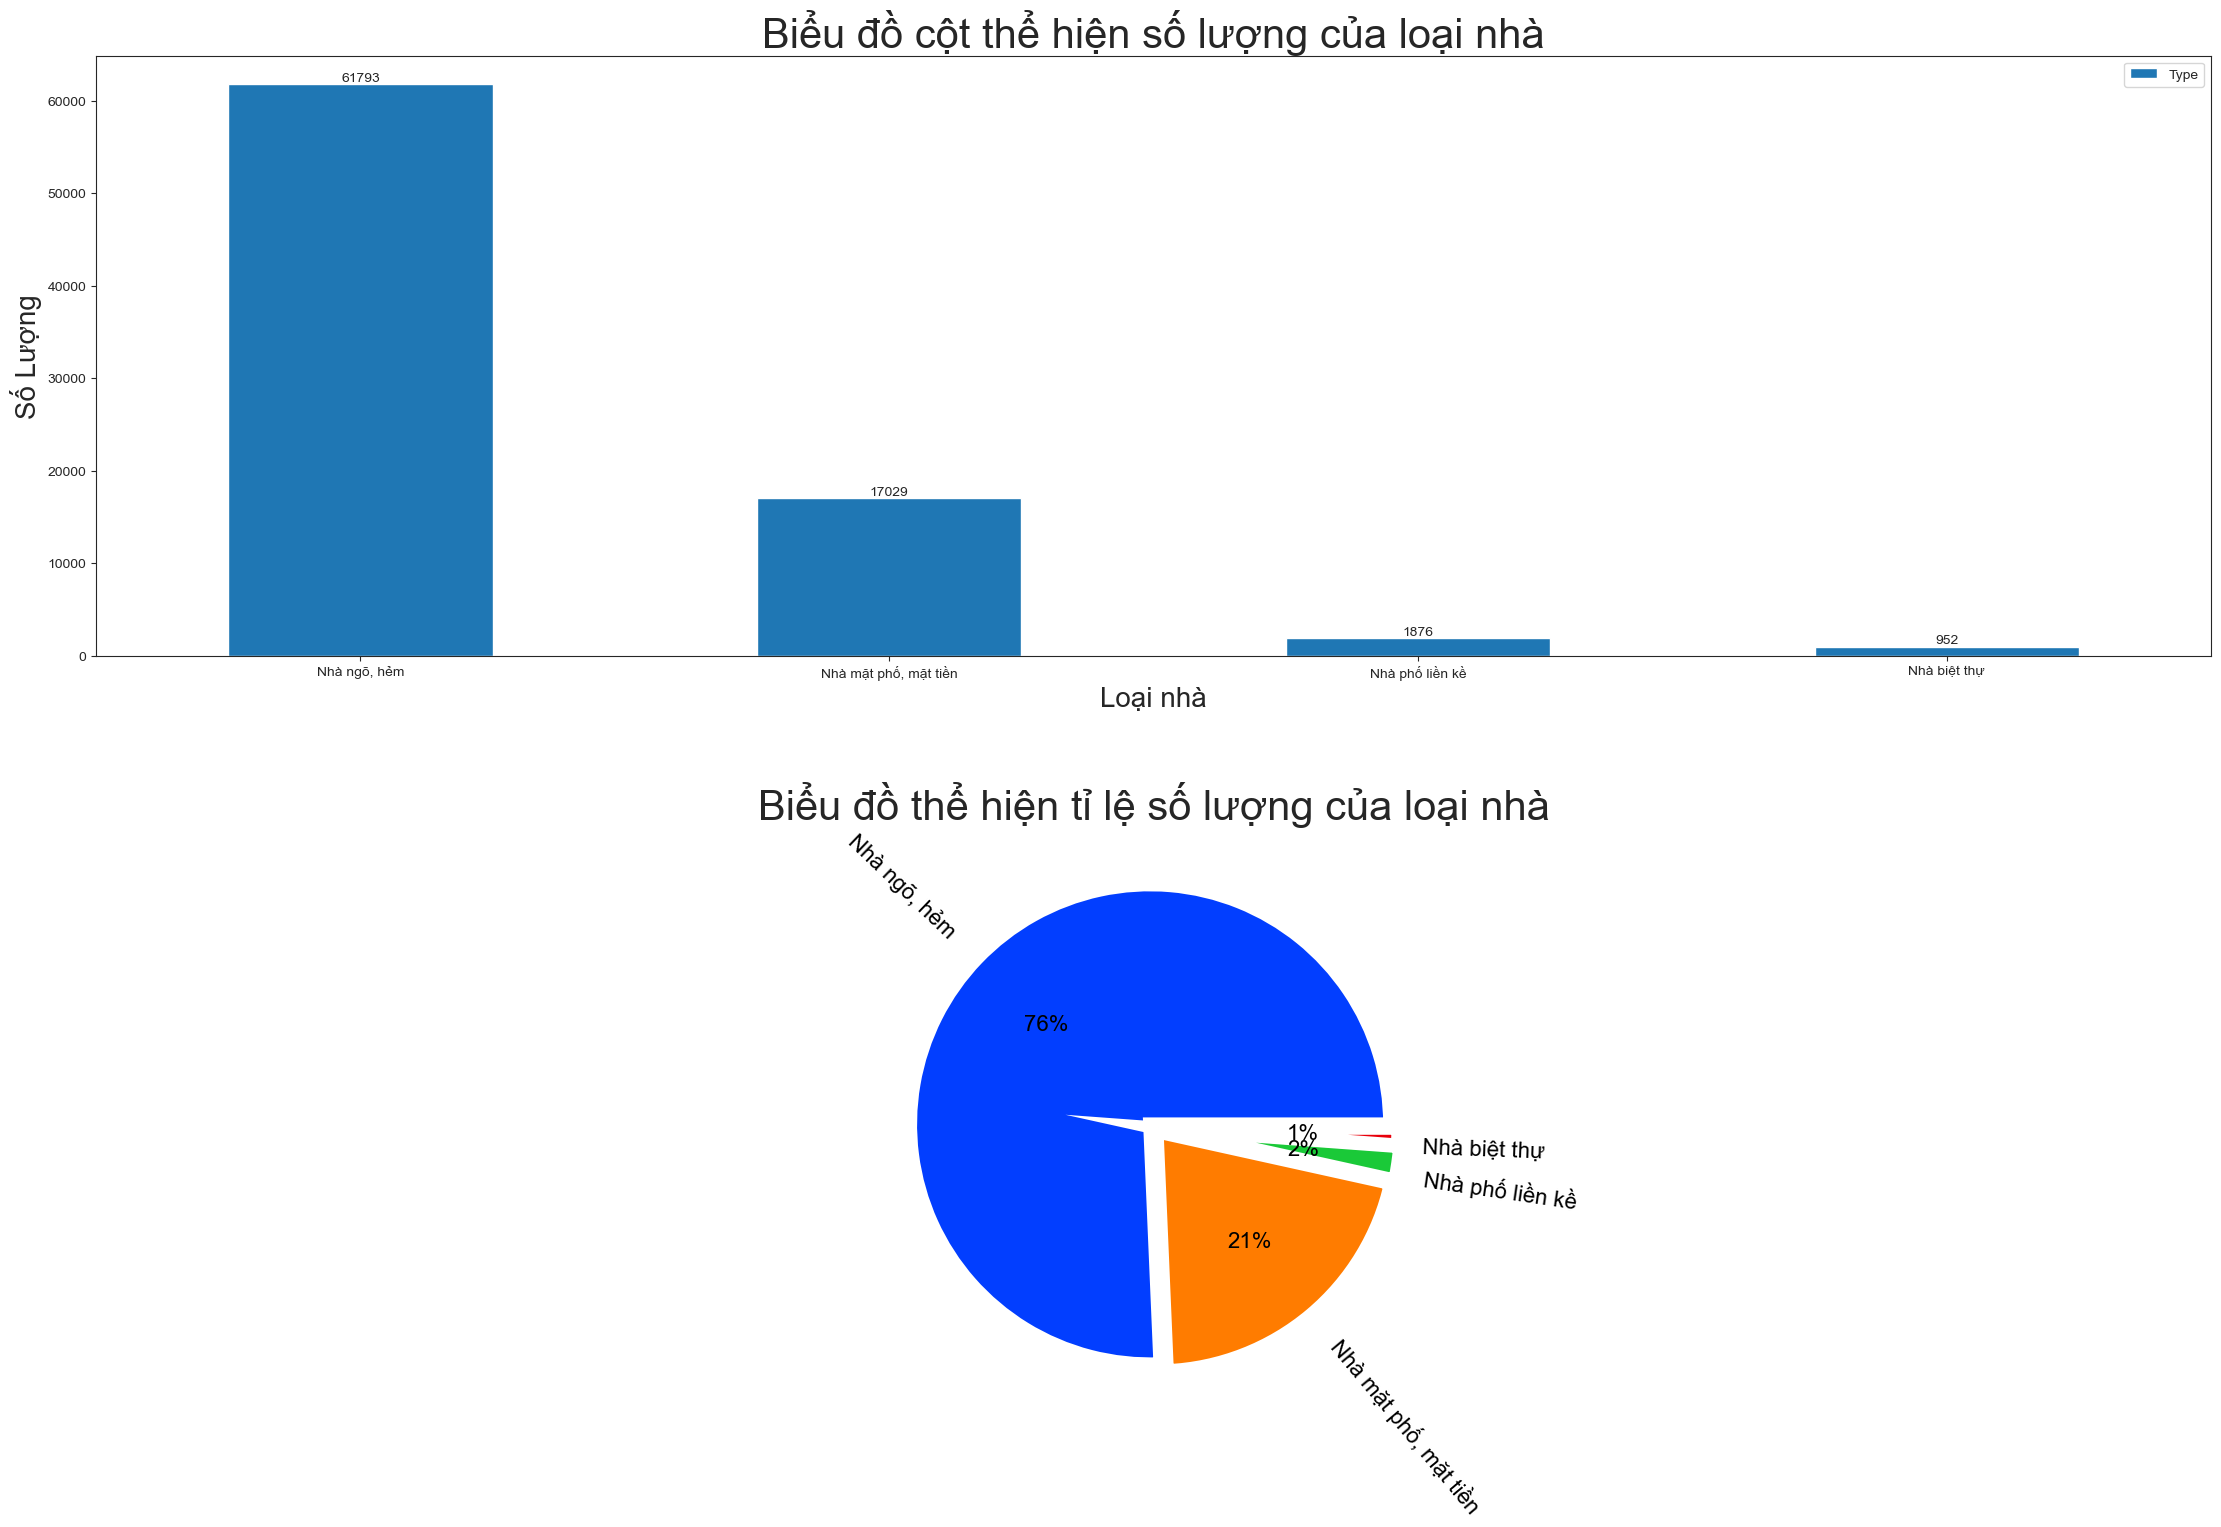

In [108]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(a2size_ls)

ax[1].pie(
    num_type_df.Type,
    labels = labels,
    colors = colors,
    autopct = '%0.0f%%',
    explode = explode,
    # shadow= True,
    # startangle = 90,
    textprops = {'color': 'Black','fontsize':16},
    wedgeprops = {'linewidth': 10},
    rotatelabels = 'true',
)
ax[1].set_title("Biểu đồ thể hiện tỉ lệ số lượng của loại nhà", fontsize = 30)

num_type_df.plot.bar(ax = ax[0], rot= 0)
for i in ax[0].containers:
    ax[0].bar_label(i,)
ax[0].set_xlabel("Loại nhà", fontsize = 20)
ax[0].set_ylabel("Số Lượng", fontsize = 20)
ax[0].set_title("Biểu đồ cột thể hiện số lượng của loại nhà", fontsize = 30)

plt.tight_layout(pad = 5.0)
plt.show()

Số lượng `Nhà ngõ, hẻm` có nhiều nhất, chiếm đến 76% dữ liệu (không tính các giá trị `NaN`). Tuy Số lượng `NaN` rất ít nhưng vẫn có thể làm thay đổi các giá trị bên trên.

- **Legal**

In [109]:
legal_df = housing_df.Legal.copy()
legal_df.head()

0    Đã có sổ
1    NaN     
2    Đã có sổ
3    Đã có sổ
4    NaN     
Name: Legal, dtype: object

In [110]:
legal_df.unique()

array(['Đã có sổ', nan, 'Đang chờ sổ', 'Giấy tờ khác'], dtype=object)

Giá trị `NaN` trong cột này không biết mang ý nghĩa gì, vì thông tin trong Dataset không đề cập tới, cũng không có thông tin cách thu thập. Nên giá trị `NaN` này sẽ được hiểu dưới ý nghĩa là `Không có thông tin`.

In [111]:
num_legal_df = legal_df.value_counts().to_frame()

In [112]:
labels = num_legal_df.index.tolist()
colors = sns.color_palette('bright')
explode = np.zeros(len(labels)) + 0.02
explode[labels.index(max(labels))] = 0.0

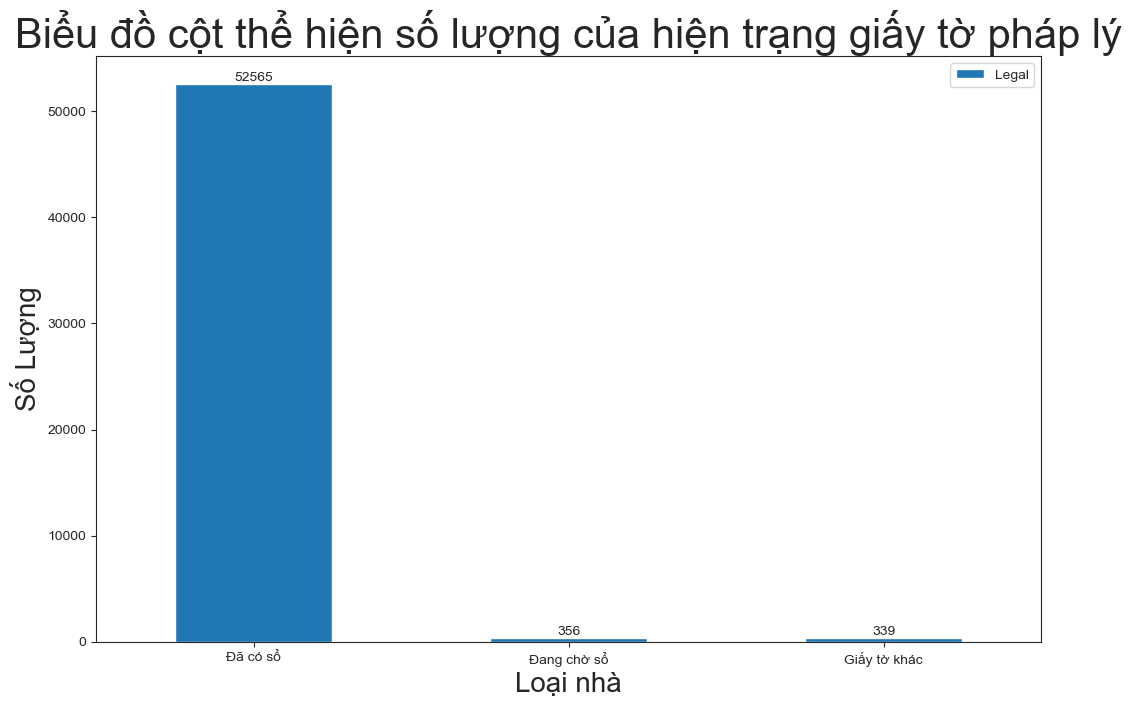

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(a4size)

num_legal_df.plot.bar(ax = ax, rot= 0)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel("Loại nhà", fontsize = 20)
ax.set_ylabel("Số Lượng", fontsize = 20)
ax.set_title("Biểu đồ cột thể hiện số lượng của hiện trạng giấy tờ pháp lý", fontsize = 30)

plt.tight_layout(pad = 5.0)
plt.show()

- **Number of bedrooms**

In [114]:
housing_df["Number of bedrooms"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       nan], dtype=object)

In [115]:
housing_df["Number of bedrooms"][housing_df["Number of bedrooms"] == 'nhiều hơn 10 phòng']

5        nhiều hơn 10 phòng
17       nhiều hơn 10 phòng
56       nhiều hơn 10 phòng
170      nhiều hơn 10 phòng
284      nhiều hơn 10 phòng
                ...        
81489    nhiều hơn 10 phòng
81541    nhiều hơn 10 phòng
81593    nhiều hơn 10 phòng
81626    nhiều hơn 10 phòng
81641    nhiều hơn 10 phòng
Name: Number of bedrooms, Length: 865, dtype: object

Các giá trị bên trong cột `Number of bedrooms` được định dạng `<Số phòng>` + ` 'phòng'` <br>
Ta đưa cột này trở về dạng số để dễ cho học máy hoặc trực quan hóa dữ liệu (nếu có)<br>

Trong dữ liệu có một giá trị `nhiều hơn 10 phòng` sẽ được định dạng là số `11`

**Thay đổi các giá trị cột `Number of bedrooms` theo định dạng trên.**

In [116]:
def change_number_bedrooms(value):
    if isinstance(value, str):
        first = value.split(" ")[0]
        if first.isnumeric():
            return int(first)
        else:
            return 11
    else:
        return value

Test hàm

In [117]:
assert change_number_bedrooms("10 phòng") == 10
assert change_number_bedrooms("nhiều hơn 10 phòng") == 11

**Thay đổi giá trị cột `number of bedrooms` trong Dataframe chính - `housing_df`**

In [118]:
housing_df["Number of bedrooms"] = housing_df["Number of bedrooms"].apply(change_number_bedrooms)

- **Number of floors**

In [119]:
numF_df = housing_df["Number of floors"]

In [120]:
numF_df.unique()

array(['4', nan, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

Tại sao có nhà `73, 65, ...` tầng, nhưng lại có nhà `Nhiều hơn 10 tầng` ??? 

In [121]:
morethan10F = [ '45', '33', '42', '25', '73', '12', '65', '55', '30', '14', '40', '52', '54', '32', '29', '50', '38', '35']

In [122]:
housing_df[housing_df["Number of floors"] == "Nhiều hơn 10"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
4717,2020-08-02,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,9.0,146 m²,18 m,8.2 m,"421,92 triệu/m²"
38211,2020-07-11,"Phố Dương Khuê, Phường Mai Dịch, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Mai Dịch,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,11.0,60 m²,NaN,NaN,240 triệu/m²
63229,2020-06-21,"Đường Hàng Bài, Phường Hàng Bài, Quận Hoàn Kiếm, Hà Nội",Quận Hoàn Kiếm,Phường Hàng Bài,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,11.0,399 m²,39 m,10 m,"601,5 triệu/m²"
67837,2020-06-17,"Đường Bưởi, Phường Vĩnh Phúc, Quận Ba Đình, Hà Nội",Quận Ba Đình,Phường Vĩnh Phúc,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,11.0,600 m²,NaN,NaN,400 triệu/m²
70365,2020-06-16,"Đường Trấn Vũ, Phường Trúc Bạch, Quận Ba Đình, Hà Nội",Quận Ba Đình,Phường Trúc Bạch,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,11.0,211 m²,26 m,8 m,"417,06 triệu/m²"
78499,2020-06-08,"Đường Dương Khuê, Phường Mai Dịch, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Mai Dịch,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,11.0,60 m²,NaN,NaN,"283,33 triệu/m²"
81046,2020-06-06,"Đường Cầu Giấy, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,11.0,179 m²,NaN,9 m,"256,98 triệu/m²"


In [123]:
housing_df[housing_df["Number of floors"] == "73"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
35396,2020-07-14,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Thụy Khuê,Nhà biệt thự,Đã có sổ,73,6.0,73 m²,14 m,5 m,"81,37 triệu/m²"


In [124]:
housing_df[housing_df["Number of floors"] == "65"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
41174,2020-07-09,"Đường An Hòa, Phường Mộ Lao, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,65,6.0,98 m²,NaN,8 m,"66,33 triệu/m²"


In [125]:
housing_df[housing_df["Number of floors"] == "12"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
39083,2020-07-10,"12, Đường Nguyễn Phúc Lai, Phường Ô Chợ Dừa, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Ô Chợ Dừa,Nhà phố liền kề,Đã có sổ,12,5.0,59 m²,11 m,5 m,"144,07 triệu/m²"
81299,2020-06-03,"Đường Đường Láng, Phường Láng Thượng, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Láng Thượng,"Nhà mặt phố, mặt tiền",Đã có sổ,12,11.0,170 m²,NaN,8.5 m,"273,53 triệu/m²"


In [126]:
housing_df[housing_df["Number of floors"].isin(morethan10F)].shape[0]

33

Không biết đây có phải là các dữ liệu mâu thuẫn, gây nhiễu hay không. Ta sẽ tiến hành thay đổi như sau:
- Chuỗi "`Nhiều hơn 10`" chuyển thành `11`.
- Các giá trị khác giữ nguyên.

In [127]:
def change_number_F(value):
    if type(value) in (int, float):
        return value
    elif value.isnumeric():
        return value
    else: return 11 

**Thay đổi giá trị cột `Number of floors`**

In [128]:
# housing_df["Number of floors"] = housing_df["Number of floors"].apply(change_number_F)
housing_df["Number of floors"] = housing_df["Number of floors"].str.replace('Nhiều hơn 10', '11')

In [129]:
numF_count = housing_df["Number of floors"].value_counts()
numF_count.index = numF_count.index.astype(int)
numF_count.sort_index(inplace=True)

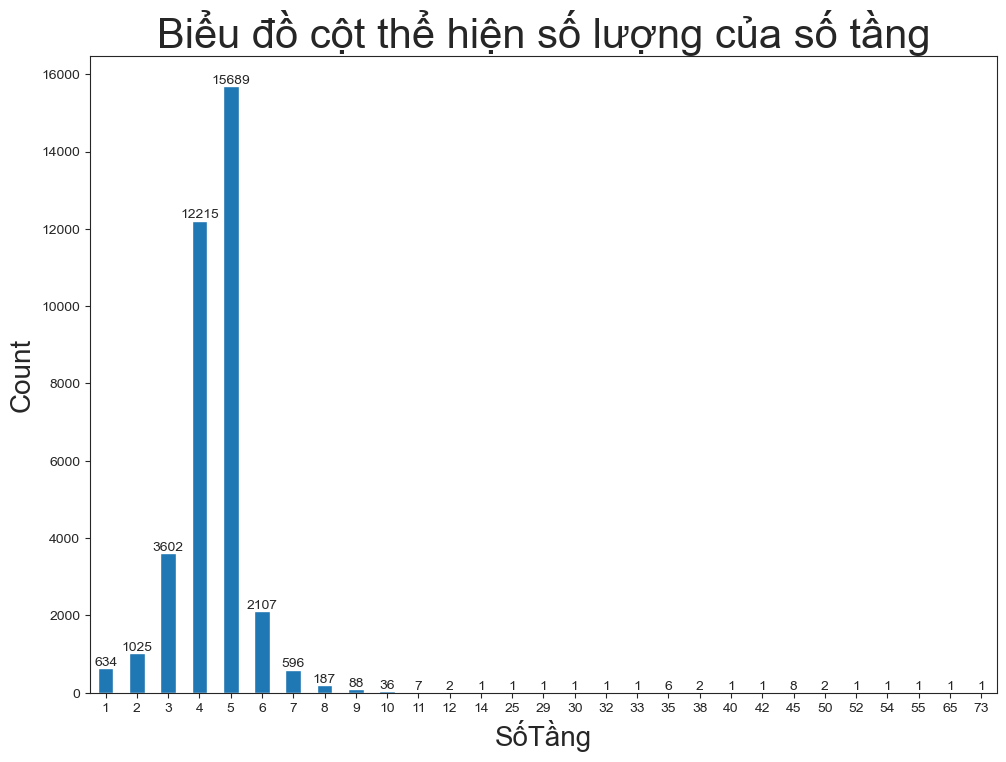

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(a4size)

numF_count.plot.bar(rot = 0, ax = ax)
ax.set_xlabel("SốTầng", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Biểu đồ cột thể hiện số lượng của số tầng", fontsize =30)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Số tầng lớn hơn 10 không quá nhiều, có lẻ không ảnh hưởng mấy đến các quá trình sau.

- **Length - Width - Area - Price/m2**

In [131]:
housing_df[~housing_df.Length.isna()].Length

2        10 m   
3        12.75 m
4        9 m    
5        12.1 m 
8        12 m   
         ...    
81540    13 m   
81541    16 m   
81544    14 m   
81546    20 m   
81547    20 m   
Name: Length, Length: 19748, dtype: object

Ta nhận thấy ngoài giá trị `NaN`, các giá trị còn lại được định dạng theo `<số kích thước>` `"m"`

Xây dựng một hàm để tách số ra khỏi `m`

In [132]:
# housing_df.Length = housing_df.Length.apply(split_size)
housing_df['Length'] = housing_df['Length'].str.replace('m', '').astype(float)

<AxesSubplot:>

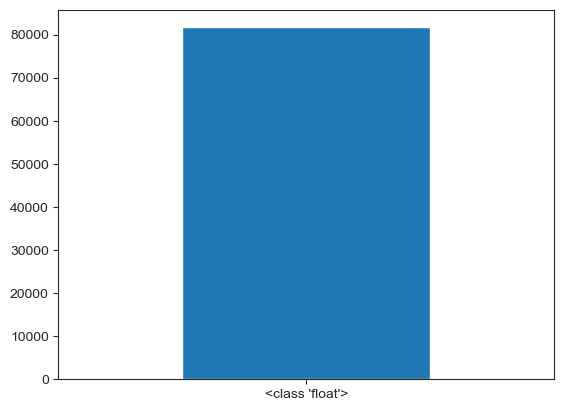

In [133]:
num_type = housing_df.Length.apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

Như vậy các giá trị của cột `Length` đều đã chuyển thành công sang dạng float và bỏ qua chữ `m`. Không có giá trị bị nhiễu, vì nếu có thì biểu đồ ở trên sẽ trả ra 2 kiểu dữ liệu là `float` và `string`.

In [134]:
housing_df[~housing_df.Width.isna()].Width

2        4 m  
3        4 m  
4        4 m  
5        3.8 m
6        4.5 m
         ...  
81542    4 m  
81544    5 m  
81545    3 m  
81546    4 m  
81547    4 m  
Name: Width, Length: 35297, dtype: object

Vậy có thể cột `Width` cũng giống như `Length`

In [135]:
housing_df['Width'] = housing_df['Width'].str.replace('m', '').astype(float)

<AxesSubplot:>

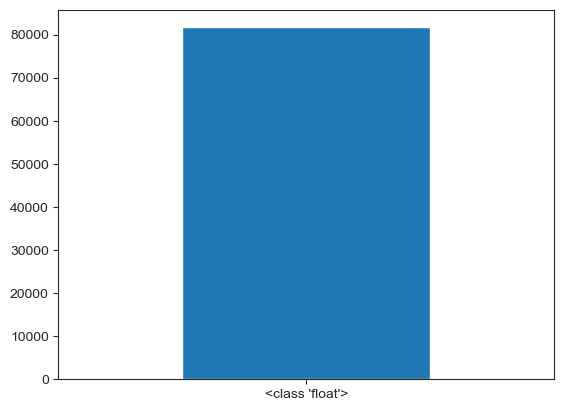

In [136]:
num_type = housing_df.Width.apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

Cột **Area**:

In [137]:
housing_df[~housing_df.Area.isna()].Area

0        46 m²
1        37 m²
2        40 m²
3        51 m²
4        36 m²
         ...  
81676    38 m²
81677    50 m²
81678    41 m²
81679    60 m²
81680    45 m²
Name: Area, Length: 81680, dtype: object

Chuyển m² về dạng float

In [138]:
housing_df['Area'] = housing_df['Area'].str.replace('m²', '').astype(float)
# housing_df['Area'].astype(float)

<AxesSubplot:>

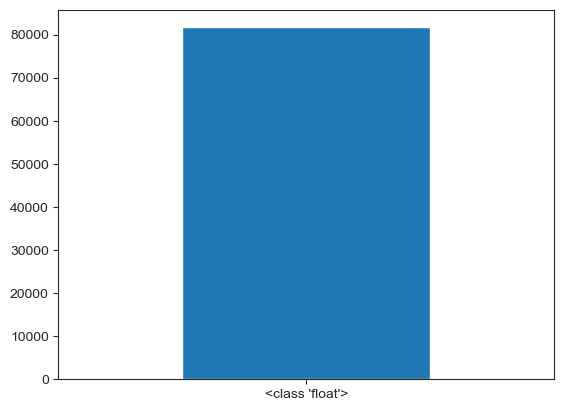

In [139]:
num_type = housing_df.Area.apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

Cột **Price/m²**:

<AxesSubplot:>

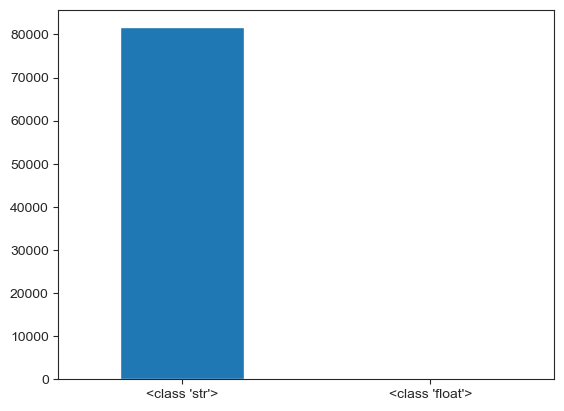

In [140]:
num_type = housing_df["Price/m2"].apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

In [141]:
housing_df["Price/m2"]

0        86,96 triệu/m² 
1        116,22 triệu/m²
2        65 triệu/m²    
3        100 triệu/m²   
4        86,11 triệu/m² 
              ...       
81676    81,58 triệu/m² 
81677    292 triệu/m²   
81678    341,46 triệu/m²
81679    101,67 triệu/m²
81680    102,22 triệu/m²
Name: Price/m2, Length: 81681, dtype: object

In [142]:
housing_df[housing_df["Price/m2"].str.contains('tỷ/m²', na=False)]["Price/m2"].unique()

array(['1,202777777 tỷ/m²', '1,142857142 tỷ/m²', '1,96 tỷ/m²',
       '1,557142857 tỷ/m²', '1,316666666 tỷ/m²', '1,2 tỷ/m²',
       '1,111111111 tỷ/m²', '1,8 tỷ/m²', '2,2 tỷ/m²', '2,28 tỷ/m²',
       '1,166666666 tỷ/m²', '1,324324324 tỷ/m²', '1,297297297 tỷ/m²',
       '1,06 tỷ/m²', '3,536585365 tỷ/m²', '1,133333333 tỷ/m²',
       '2,1001 tỷ/m²', '1 tỷ/m²', '2,65 tỷ/m²', '1,153846153 tỷ/m²',
       '1,594405594 tỷ/m²', '1,597222222 tỷ/m²', '11,5 tỷ/m²',
       '10,416666666 tỷ/m²', '6,5 tỷ/m²', '1,446153846 tỷ/m²',
       '8,333333333 tỷ/m²', '7,894736842 tỷ/m²', '1,114285714 tỷ/m²',
       '1,008333333 tỷ/m²', '6,833333333 tỷ/m²', '1,023809523 tỷ/m²',
       '1,586206896 tỷ/m²', '1,52 tỷ/m²', '124 tỷ/m²', '52,5 tỷ/m²',
       '1,3 tỷ/m²', '16,7 tỷ/m²', '1,14 tỷ/m²', '8,9 tỷ/m²',
       '1,2875 tỷ/m²', '1,25 tỷ/m²', '1,076923076 tỷ/m²',
       '1,777777777 tỷ/m²', '1,79245283 tỷ/m²', '1,083333333 tỷ/m²',
       '3,898305084 tỷ/m²', '1,125 tỷ/m²', '6,666666666 tỷ/m²',
       '1,03333333

Các giá tiền có một chút bị `lỗi`, thay vì dấu ".", cột này lại định dạng theo dấu ",". Tuy nhiên, một vài giá trị lại vừa có "." vừa có ","?
- Dấu chấm là dấu phân cách giữa hàng nghìn
- Dấu phẩy là dấu thập phân

Ta sẽ xoá các dấu chấm sau đó thay đổi dấu phẩy thành dấu chấm (biểu diễn cho số thực)

In [143]:
housing_df["Price/m2"] = housing_df["Price/m2"].str.replace('.', '').str.replace(',', '.')
housing_df["Price/m2"]

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_1762/1912939602.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  housing_df["Price/m2"] = housing_df["Price/m2"].str.replace('.', '').str.replace(',', '.')


0        86.96 triệu/m² 
1        116.22 triệu/m²
2        65 triệu/m²    
3        100 triệu/m²   
4        86.11 triệu/m² 
              ...       
81676    81.58 triệu/m² 
81677    292 triệu/m²   
81678    341.46 triệu/m²
81679    101.67 triệu/m²
81680    102.22 triệu/m²
Name: Price/m2, Length: 81681, dtype: object

triệu/m²    80813
đ/m²        738  
tỷ/m²       118  
dtype: int64


<AxesSubplot:title={'center':'Các loại giá trị nằm trong cột Price/m²'}, xlabel='0'>

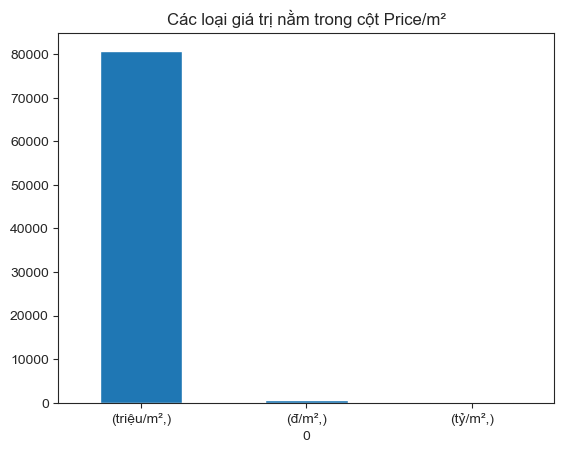

In [144]:
unit = housing_df["Price/m2"].str.extract('[\d.,]+\s([\w/]+)').value_counts()
print(unit)
unit.plot.bar(rot=0, title='Các loại giá trị nằm trong cột Price/m²')

Như vậy có 3 đơn vị giá tiền trong cột. Đó là `triệu/m2`, `đ/m2` và `tỷ/m2`

In [145]:
housing_df['Unit'] = housing_df["Price/m2"].str.extract('[\d.,]+\s([\w/]+)')

Có rất nhiều cách để thể hiện mức giá. Một trong các cách có thể là: xử lý các giá trị này bằng cách thay các đơn vị giá tiền thành số thực:
- Ví dụ: 1 triệu/m² = 1e6, 1 tỷ/m² = 1e9
- Nhân giá tiền với các số thực trên

In [146]:
def change_currency(val):
    if isinstance(val, str):
        if len(val.split()) > 1:
            return val[0]
    return val   
 
housing_df['Price/m2'] = housing_df['Price/m2'].replace(
    {' đ/m²': '*1e1', ' triệu/m²': '*1e6', ' tỷ/m²': '*1e9', np.nan: 0.0}, regex=True).map(pd.eval)

/Users/marconguyen0802/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Biểu đồ phân bố giá của các căn nhà ở Hà Nội')

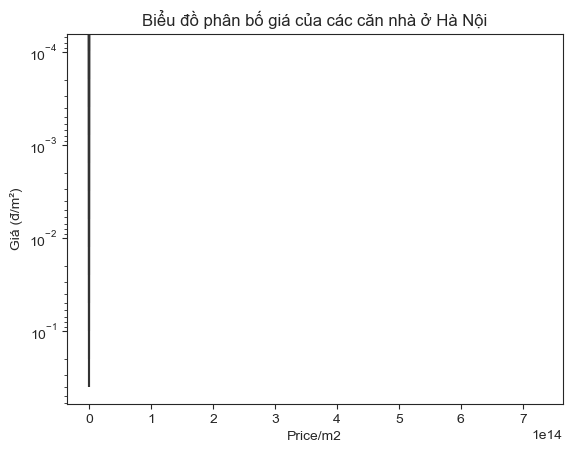

In [147]:
fig, ax = plt.subplots()
sns.boxenplot(housing_df['Price/m2'], ax=ax)
ax.set_yscale('log')
ax.set_ylabel('Giá (đ/m²)')
ax.set_title('Biểu đồ phân bố giá của các căn nhà ở Hà Nội')

# **Thông tin các cột**

| Tên cột | Kiểu dữ liệu | Mô tả | 
| --- | --- | --- |
| Date | datetime | Ngày đăng bán | 
| Address | string | Địa chỉ căn nhà | 
| District | string | Quận |
| Ward | string | Huyện | 
| Type | string | Kiểu nhà ở |
| Legal | string | Giấy tờ pháp lý của nhà ở |  
| Number of floors | float | Số tầng | 
| Number of bedrooms | float | Số phòng ngủ |
| Area | float | Diện tích căn nhà |
| Length | float | Chiều dài căn nhà |
| Width | float | Chiều rộng căn nhà |
| Price/m2 | string | Số tiền mua căn nhà | 
| Unit | string | Đơn vị của giá tiền |


In [148]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81681 entries, 0 to 81680
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                81681 non-null  datetime64[ns]
 1   Address             81634 non-null  object        
 2   District            81680 non-null  object        
 3   Ward                81634 non-null  object        
 4   Type                81650 non-null  object        
 5   Legal               53260 non-null  object        
 6   Number of floors    36219 non-null  object        
 7   Number of bedrooms  81643 non-null  float64       
 8   Area                81680 non-null  float64       
 9   Length              19748 non-null  float64       
 10  Width               35297 non-null  float64       
 11  Price/m2            81681 non-null  float64       
 12  Unit                81669 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
me

In [149]:
housing_df.columns

Index(['Date', 'Address', 'District', 'Ward', 'Type', 'Legal',
       'Number of floors', 'Number of bedrooms', 'Area', 'Length', 'Width',
       'Price/m2', 'Unit'],
      dtype='object')

Thông tin các giá trị của các cột `categorical`:

In [150]:
cate_cols = ['Address', 'District', 'Ward', 'Type', 'Legal','Number of floors', 'Number of bedrooms', 'Unit']
cate_profiles = {'missing_ratio': housing_df[cate_cols].isna().sum() * 100.0/len (housing_df[columns]),
                    'num_diff_vals': housing_df[cate_cols].nunique (dropna=True),
                    'diff vals': housing_df[cate_cols].stack(dropna=True).groupby(level= [1]). unique (),
}
cate_col_profiles_df = pd.DataFrame(cate_profiles)#.transpose()
cate_col_profiles_df

missing_ratio  num_diff_vals  \
Address             0.057541       13957           
District            0.001224       29              
Legal               34.795118      3               
Number of bedrooms  0.046522       11              
Number of floors    55.657987      29              
Type                0.037953       4               
Unit                0.014691       3               
Ward                0.057541       309             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Thông tin các giá trị của các cột `numeric`:

In [151]:
nume_cols = list(set(housing_df.columns) - set(cate_cols))
numeric_profiles = {'missing_ratio': housing_df[nume_cols].isna().sum() * 100.0/len( housing_df[nume_cols]),
                        'min':  housing_df[nume_cols].min(),
                        'max':  housing_df[nume_cols].max()}
numeric_profiles = pd.DataFrame(numeric_profiles).T
numeric_profiles

,Date,Length,Area,Width,Price/m2
missing_ratio,0.0,75.823019,0.001224,56.786768,0.0
min,2019-08-05 00:00:00,1.0,1.0,1.0,0.0
max,2020-08-05 00:00:00,900000.0,111411.0,423432.0,728000007280000.0


In [152]:
housing_df.to_csv("./csv/EDA_Preprocessing.csv", index=False)

# **LƯU Ý**<br>
- Chỉnh lại kiểu dữ liệu cho cột `Date` nếu tạo file ipynb cho phần `Đặt câu hỏi`